<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Nets for Sequential Data

-----
**OBJECTIVES**

- Explore Recurrent Architectures for sequential data
- Explore Convolutional Architectures for sequential data
- Use RNN's to model numeric time series data
- Use RNN's and CNN's to model text data
------

## The Recurrent Node

Compared to a convential neuron, our recurrent neuron will take in an output from the layer itself.  

<center>
   <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/440px-Recurrent_neural_network_unfold.svg.png />
</center>



### The Network Architecture

```python
state_t = 0
for input_t in input_sequences:
    output_t = tanh(W@input_t + U@state_t + b)
    state_t = output_t
```



### A Basic Sequence of Stock Prices

To begin, let's bring in stock data from yahoo using the `pandas_datareader`. 

In [1]:
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# !pip install -U pandas_datareader

In [4]:
#get apple stock
apple = pdr.get_data_yahoo("AAPL")
#apple2 = pd.read_csv('appl.csv', index_col = 0)

In [5]:
#take a peek
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-12,35.537498,35.252499,35.400002,35.450001,81400000.0,33.470463
2017-04-13,35.595001,35.262501,35.477501,35.262501,71291600.0,33.293442
2017-04-17,35.470001,35.217499,35.369999,35.457500,66328400.0,33.477558
2017-04-18,35.509998,35.277500,35.352501,35.299999,58790000.0,33.328842
2017-04-19,35.500000,35.112499,35.470001,35.169998,69313600.0,33.206108


In [ ]:
# apple.to_csv('appl.csv')

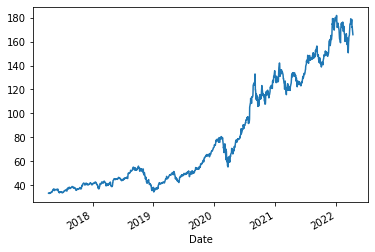

In [6]:
#plot the adjusted close
apple['Adj Close'].plot()

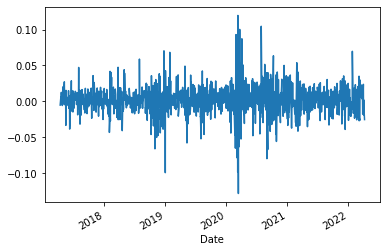

In [7]:
#look at the percent change
apple['Adj Close'].pct_change().plot()

In [8]:
#determine X and y
apple_pchange = apple.pct_change().dropna()
X = apple_pchange[['High', 'Low', 'Open', 'Volume']]
y2 = apple_pchange['Adj Close']

In [9]:
#train test split: no shuffle!
y = np.where(y2 > 0, 1, 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
 #make a classification problem

In [10]:
X_train.head()

,High,Low,Open,Volume
Date,,,,
2017-04-13,0.001618,0.000284,0.002189,-0.124182
2017-04-17,-0.003512,-0.001276,-0.003030,-0.069618
2017-04-18,0.001128,0.001704,-0.000495,-0.113653
2017-04-19,-0.000282,-0.004677,0.003324,0.179003
2017-04-20,0.006479,0.005055,-0.004652,0.345745


### Scaling
------

Per usual we need to scale our data for the network.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
#instantiate
scaler = StandardScaler()

In [13]:
#fit and transform
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

### `TimeSeriesGenerator`
-------
This creates stacks of sequenced data of which we specify the length of the sequences desired.

In [17]:
# !pip install tensorflow
# !pip install keras

In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
train_sequences = TimeseriesGenerator(x_train, y_train, length = 3)

In [18]:
# list(train_sequences)

In [19]:
test_sequences = TimeseriesGenerator(x_test, y_test, length = 3)

In [ ]:
#test sequences


### Model with `SimpleRNN`
--------

- 1 `SimpleRNN` layer
- 1 hidden `Dense` layer

In [22]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, Dense

In [23]:
#build the network
rnn_model = Sequential()
rnn_model.add(SimpleRNN(8, input_shape = (3, 4))) #hidden RNN
rnn_model.add(Dense(20, activation = 'relu')) #hidden Dense
rnn_model.add(Dense(1, activation = 'sigmoid')) #output layer -- binary classification


NotImplementedError: Cannot convert a symbolic Tensor (simple_rnn_1/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
#compilation


In [ ]:
#fit it


In [ ]:
#loss?


### The `LSTM` and `GRU` layers

In [ ]:
#network with LSTM
model2 = Sequential()
model2.add(LSTM(16))
model2.add(Dense(50, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#compile
model2.compile(loss = 'bce', metrics = ['accuracy'])

In [ ]:
#fit


In [ ]:
#examine the loss
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Val')
plt.legend();

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Val')
plt.legend();

In [ ]:
#GRU layer
model3 = Sequential()
model3.add(GRU(16))
model3.add(Dense(50, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#compile
model3.compile(loss = 'bce', metrics = ['accuracy'])

In [ ]:
#train_sequences.targets

In [ ]:
#fit


In [ ]:
#examine the loss


In [ ]:
#stacking layers
model4 = Sequential()
model4.add(GRU(32, return_sequences = True))
# model4.add(GRU(16, return_sequences = True))
# model4.add(GRU(16, return_sequences = True))
model4.add(GRU(16))
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(1, activation = 'sigmoid'))
model4.compile(loss = 'bce', metrics = ['accuracy'])
history = model4.fit(train_sequences, validation_data = test_sequences, epochs = 10)

### Practice

Use pandas datareader to access stock data for a ticker of interest.  Build and compare different sequential models using `GRU` layers.   

### Sequential Models for Text
-------

Now, we use the Keras `Tokenizer` to preprocess our spam data and feed it through different architectures of sequential network models.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
spam = pd.read_csv('data/sms_spam.csv')

In [ ]:
spam.head()

### `Tokenizer`
------
Here, we set the limit to the number of words at 500, then fit the texts, and finally transform our text to sequences of integer values with the `.texts_to_sequences`.  To assure the same length we use the `pad_sequences` function.  

In [ ]:
#create a tokenizer and specify the vocabulary
tokenizer = Tokenizer(500)

In [ ]:
#fit it on text
tokenizer.fit_on_texts(spam['text'])

In [ ]:
#generate sequences
sequences = tokenizer.texts_to_sequences(spam['text'])

In [ ]:
sequences[:3]

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
#pad sequences to 100
X = pad_sequences(sequences, maxlen = 100)

In [ ]:
#take a peek
X[0]

### Model
-------

In [ ]:
from keras.layers import Embedding

In [ ]:
#sequential model
text_model1 = Sequential()
#embedding layer
text_model1.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
#simple RNN
text_model1.add(SimpleRNN(16))
#dense layer
text_model1.add(Dense(20, activation = 'relu'))
#output
text_model1.add(Dense(1, activation = 'sigmoid'))
#compilation
text_model1.compile(loss = 'bce', metrics = ['accuracy'])

In [ ]:
#make y binary
y = np.where(spam['type'] == 'ham', 0, 1)

In [ ]:
#baseline?


In [ ]:
#fit it


### Improving the Model
-----

- `LSTM` layers
- `GRU` layers
- `recurrent_dropout`
- `dropout`
- `Bidirectional` layers

In [ ]:
# model = Sequential()
# model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
# model.add(GRU(16))
# model.add(Dense(20, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
# model.fit(X, y, epochs = 10)

In [ ]:
# model = Sequential()
# model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
# model.add(GRU(16, recurrent_dropout = 0.2))
# model.add(Dense(20, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
# model.fit(X, y)

In [ ]:
# model = Sequential()
# model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
# model.add(GRU(16, dropout = 0.2, recurrent_dropout = 0.2))
# model.add(Dense(20, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
# model.fit(x_seq, y)

In [ ]:
from keras.layers import Bidirectional

In [ ]:
# model = Sequential()
# model.add(Embedding(input_dim = tokenizer.num_words, output_dim = 64))
# model.add(Bidirectional(GRU(16)))
# model.add(Dense(20, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))
# model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
# model.fit(x_seq, y)

### Convolutional Networks in 1D
--------

In [ ]:
from keras.layers import Conv1D, MaxPooling1D